# Model Evaluation

### Changing to the main directory

In [ ]:
%cd ..

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting the results

This section visualizes the performance of different BERT models on precision, recall, F1 score, and accuracy metrics. The goal is to identify which model performs best across evaluation epochs and metrics.

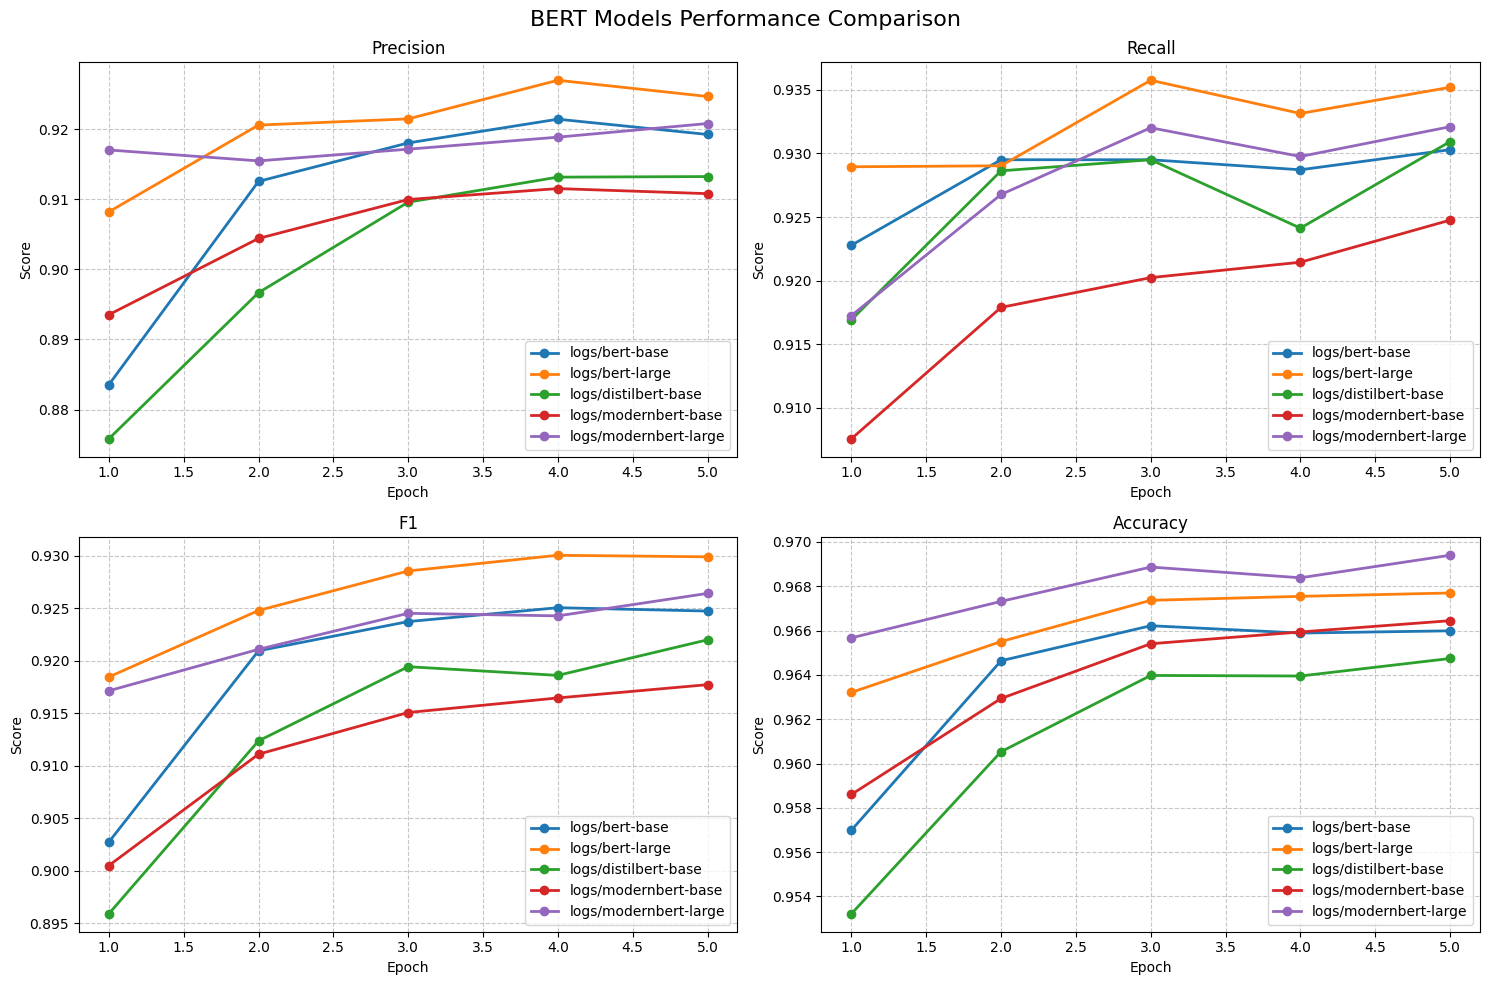


Final Metrics Comparison:
                   model  eval_precision  eval_recall   eval_f1  eval_accuracy
4        logs/bert-large        0.924670     0.935193  0.929902       0.967699
4  logs/modernbert-large        0.920809     0.932097  0.926419       0.969401
4         logs/bert-base        0.919250     0.930293  0.924739       0.965991
4   logs/distilbert-base        0.913242     0.930925  0.921999       0.964742
4   logs/modernbert-base        0.910802     0.924758  0.917727       0.966448


In [8]:
# Load all CSV files into a single dataframe with model name column
def load_results(file_paths):
    all_data = []
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        model_name = file_path.replace('electrical-ner-', '').replace('-results.csv', '')
        df['model'] = model_name
        all_data.append(df)
    return pd.concat(all_data)

# File paths: List of file paths for CSV logs containing model training and evaluation metrics.
files = [
    'logs/electrical-ner-bert-base-results.csv',
    'logs/electrical-ner-bert-large-results.csv', 
    'logs/electrical-ner-distilbert-base-results.csv',
    'logs/electrical-ner-modernbert-base-results.csv',
    'logs/electrical-ner-modernbert-large-results.csv'
]

# Create comparison plots
df = load_results(files)

# Set style
# plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('BERT Models Performance Comparison', fontsize=16)

metrics = ['eval_precision', 'eval_recall', 'eval_f1', 'eval_accuracy']
colors = sns.color_palette('husl', n_colors=len(files))

for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    for model, group in df.groupby('model'):
        ax.plot(group['epoch'], group[metric], marker='o', label=model, linewidth=2)
    
    ax.set_title(metric.replace('eval_', '').title())
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

plt.tight_layout()
plt.savefig('bert_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print final epoch metrics for each model
final_metrics = df[df['epoch'] == df['epoch'].max()].sort_values('eval_f1', ascending=False)
print("\nFinal Metrics Comparison:")
print(final_metrics[['model', 'eval_precision', 'eval_recall', 'eval_f1', 'eval_accuracy']])

Detailed analysis is outlined in the Medium article.